In [1]:
import Prot_Post as Post
import matplotlib.pyplot as plt

In [2]:
folder = r"/Users/vlagerweij/Documents/TU jaar 6/Project KOH(aq)/Repros/Quantum_to_Transport/post-processing scripts/KOH systems/test_output/1ns/"
post = Post.Prot_Post(folder)

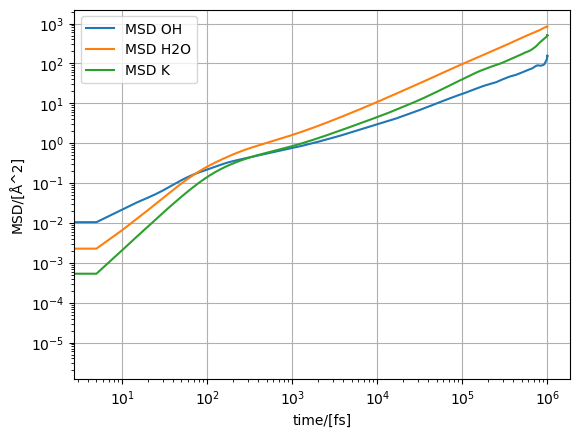

In [3]:
plt.figure()
plt.loglog(post.t, post.msd_OH, label="MSD OH")
plt.loglog(post.t, post.msd_H2O, label="MSD H2O")
plt.loglog(post.t, post.msd_K, label="MSD K")
plt.legend()
plt.xlabel('time/[fs]')
plt.ylabel('MSD/[Å^2]')
plt.grid()

In [4]:
folder = r"/Users/vlagerweij/Documents/TU jaar 6/Project KOH(aq)/Repros/Quantum_to_Transport/post-processing scripts/KOH systems/test_output/combined_simulation/"
post = Post.Prot_Post(folder)

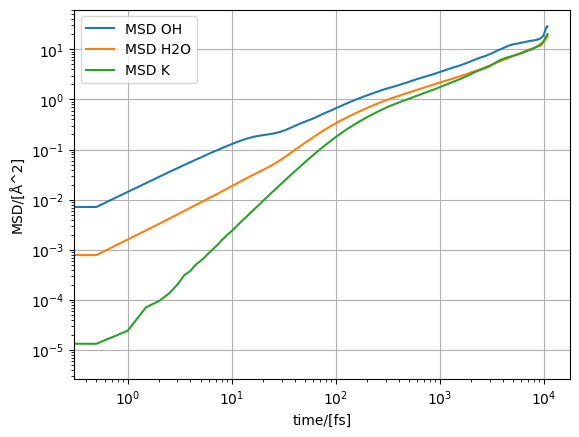

In [5]:
plt.figure()
plt.loglog(post.t, post.msd_OH, label="MSD OH")
plt.loglog(post.t, post.msd_H2O, label="MSD H2O")
plt.loglog(post.t, post.msd_K, label="MSD K")
plt.legend()
plt.xlabel('time/[fs]')
plt.ylabel('MSD/[Å^2]')
plt.grid()